In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import shap
import os
from matplotlib.lines import Line2D
import io
from PIL import Image

from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm

In [2]:
import os
path=os.getcwd()
listDir=os.listdir(path)
for x in listDir:
    print(x)

.ipynb_checkpoints
1243_CV80_all genes_with label_20230704.csv
1243_CV80_RRA_with label_20230704.csv
1243_CV80_SHAP TOP41_with label_20230704.csv
50% cell viability_SHAP_画图_20230711.ipynb
80% cell viability_SHAP_画图_20230711.ipynb
Beeplot_cv50_20230711.svg
Beeplot_cv50_20230711.tiff
CV0.5_KernelSHAP_20230710.csv
CV0.5_Voting_model_20230630.dat
CV0.8_KernelSHAP_20230701.csv
CV0.8_RF_model_20230630.dat
X_test_RRA_CV50_20230630.csv
X_test_RRA_CV80_20230630.csv
X_train_RRA_CV50_20230630.csv
X_train_RRA_CV80_20230630.csv
Y_test20230610.csv
Y_train20230610.csv


In [3]:
def get_data(cv):
    Train_metadata= pd.read_csv('Y_train20230610.csv',index_col=0)
    Test_metadata= pd.read_csv('Y_test20230610.csv',index_col=0)
    
    Train_signature= pd.read_csv('X_train_RRA_CV50_20230630.csv',index_col=0)
    Test_signature= pd.read_csv('X_test_RRA_CV50_20230630.csv',index_col=0)
    
    Y_train_val=Train_metadata[cv]
    Y_test=Test_metadata[cv]
    
    X_train_val=Train_signature
    X_test=Test_signature
   

    X_all=pd.concat([Train_signature,Test_signature], axis=0)
    Y_all=pd.concat([Y_train_val,Y_test], axis=0)
    return X_train_val,Y_train_val,X_test,Y_test,X_all,Y_all

In [4]:
X_train_val,Y_train_val,X_test,Y_test,X_all,Y_all=get_data("cv0.5")


In [6]:
shap_values_50_train=pd.read_csv("CV0.5_KernelSHAP_20230710.csv",index_col=0)


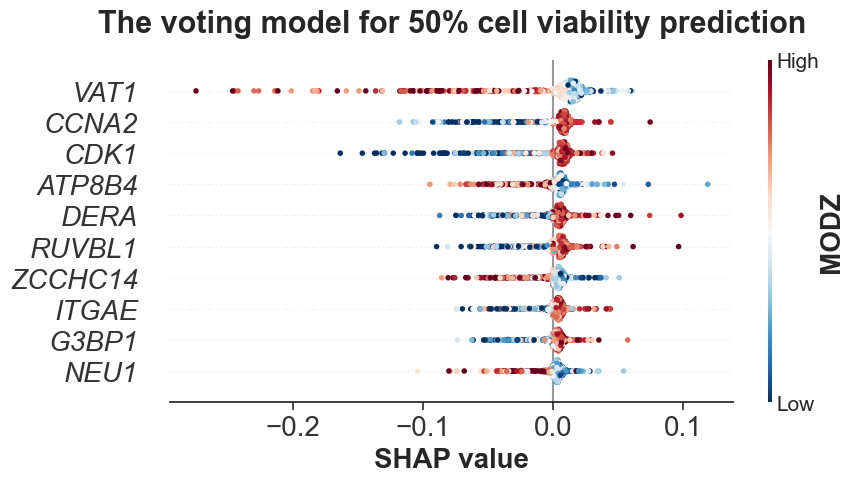

In [29]:
shap_values_50_value= shap_values_50_train.values
# after standard scalar
shap.initjs()
sns.set_theme(style='ticks')
shap.summary_plot(shap_values_50_value, X_train_val, feature_names=X_train_val.columns, max_display=10,show=False, plot_size=(9, 5), cmap=plt.get_cmap("RdBu_r"))
# Get the current figure and axes objects.
fig, ax = plt.gcf(), plt.gca()
# Modifying main plot parameters
ax.tick_params(labelsize=20)
ax.set_xlabel('SHAP value', weight = "bold", fontsize=20)
ax.set_title('The voting model for 50% cell viability prediction', fontsize=22, weight = "bold", pad = 20)
# Get colorbar
cb_ax = fig.axes[1] 
# Modifying color bar parameters
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("MODZ", weight = "bold",fontsize=20)
for tick in ax.get_yticklabels():
    tick.set_fontstyle('italic')
plt.tight_layout()
plt.savefig("Beeplot_cv50_20231109_2.svg", format='svg')

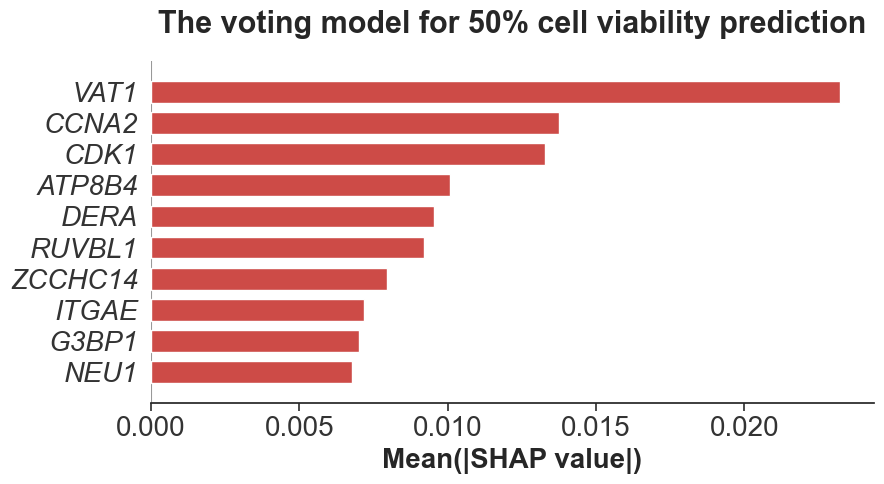

In [30]:

shap.initjs()
sns.set_theme(style='white')
shap.summary_plot(shap_values_50_value, X_train_val, feature_names=X_train_val.columns, max_display=10,show=False, color="#CD4B47",plot_size=(9, 5),plot_type="bar")
fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=20)
ax.set_xlabel('Mean(|SHAP value|)', weight = "bold", fontsize=20)
ax.set_title('The voting model for 50% cell viability prediction', fontsize=22, weight = "bold", pad = 20)
plt.tight_layout()
for tick in ax.get_yticklabels():
    tick.set_fontstyle('italic')
plt.tight_layout()
plt.savefig("Barplot_cv50_20231109_2.svg", format='svg')

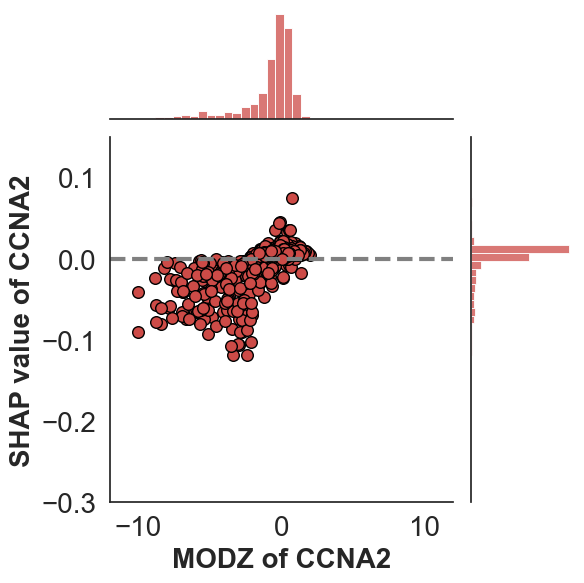

In [22]:
i="CCNA2"
df=pd.concat([X_train_val[i],shap_values_50_train[i]],axis=1)
sns.jointplot(x=df.iloc[:,0], y=df.iloc[:,1],  
              data=df,   
              color = '#CD4B47',            
              s =70, edgecolor="black",linewidth=1,
              kind = 'scatter',
              xlim=(-12,12),
              ylim=(-0.3,0.15),
              space = 0.05,
              height=6,
              ratio = 3,
              marginal_kws=dict(bins=20, rug=True,color='#CD4B47')
              ) 
fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=20)
ax.set_xlabel("MODZ of CCNA2", weight = "bold", fontsize=20)
ax.set_ylabel("SHAP value of CCNA2", weight = "bold", fontsize=20)
ax.axhline(y=0, linestyle='--', color='grey',linewidth=3)
plt.tight_layout()
plt.savefig("Dotplot_cv50_of CCNA2_20231109.svg", format='svg')



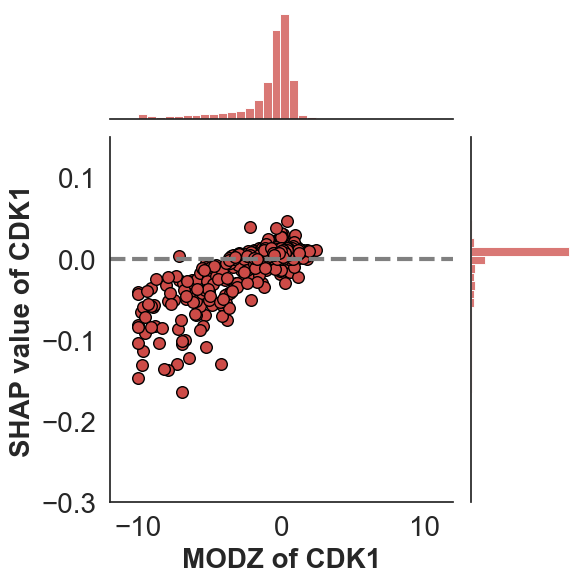

In [19]:
i="CDK1"
df=pd.concat([X_train_val[i],shap_values_50_train[i]],axis=1)
sns.jointplot(x=df.iloc[:,0], y=df.iloc[:,1],
              data=df, 
              color = '#CD4B47',              
              s =70, edgecolor="black",linewidth=1,
              kind = 'scatter',
              xlim=(-12,12),
              ylim=(-0.3,0.15),
              space = 0.05,  
              height=6,
              ratio = 3,
              marginal_kws=dict(bins=20, rug=True,color='#CD4B47')
              ) 
fig, ax = plt.gcf(), plt.gca()

    # Modifying main plot parameters
ax.tick_params(labelsize=20)
ax.set_xlabel("MODZ of CDK1", weight = "bold", fontsize=20)
ax.set_ylabel("SHAP value of CDK1", weight = "bold", fontsize=20)
ax.axhline(y=0, linestyle='--', color='grey',linewidth=3)
plt.tight_layout()
plt.savefig("Dotplot_cv50_of CDK1__20231109.svg", format='svg')


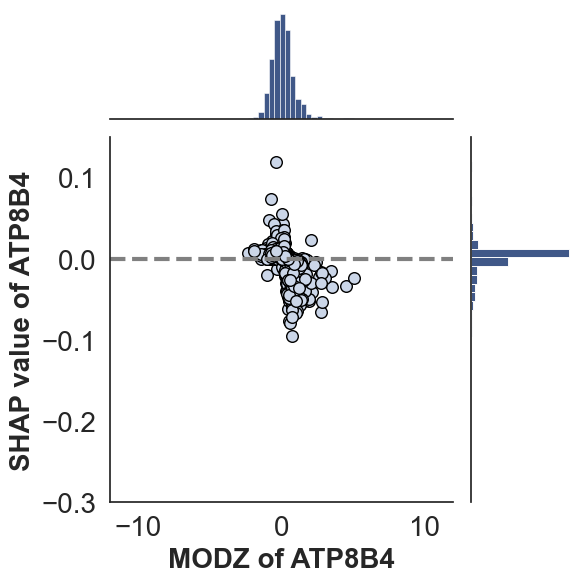

In [20]:
i="ATP8B4"
df=pd.concat([X_train_val[i],shap_values_50_train[i]],axis=1)
sns.jointplot(x=df.iloc[:,0], y=df.iloc[:,1], 
              data=df,
              color = '#CBD6E8',             
              s =70, edgecolor="black",linewidth=1, 
              kind = 'scatter',
              xlim=(-12,12),
              ylim=(-0.3,0.15),
              space = 0.05, 
              height=6,
              ratio = 3,
              marginal_kws=dict(bins=20, rug=True,color='#002060') 
              ) 
fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=20)
ax.set_xlabel("MODZ of ATP8B4", weight = "bold", fontsize=20)
ax.set_ylabel("SHAP value of ATP8B4", weight = "bold", fontsize=20)
ax.axhline(y=0, linestyle='--', color='grey',linewidth=3)
plt.tight_layout()
plt.savefig("Dotplot_cv50_of ATP8B4_20231109.svg", format='svg')



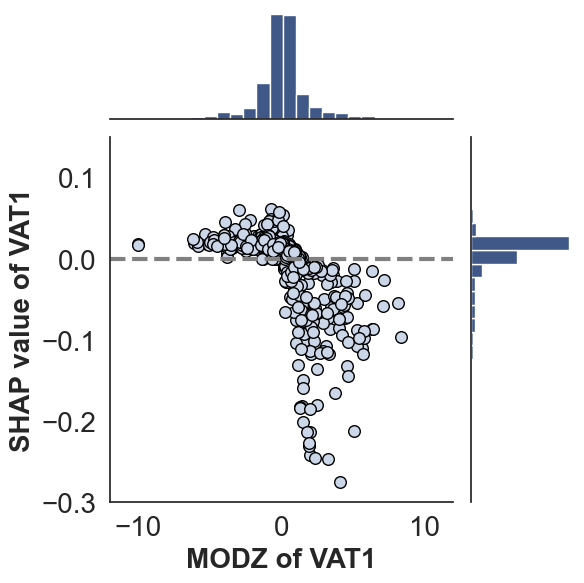

In [21]:
i="VAT1"
df=pd.concat([X_train_val[i],shap_values_50_train[i]],axis=1)
sns.jointplot(x=df.iloc[:,0], y=df.iloc[:,1], 
              data=df,   
              color = '#CBD6E8',   
              s =70, edgecolor="black",linewidth=1,
              kind = 'scatter',
              xlim=(-12,12),
              ylim=(-0.3,0.15),
              space = 0.05, 
              height=6,
              ratio = 3,
              marginal_kws=dict(bins=20, rug=True,color='#002060')
              ) 
fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=20)
ax.set_xlabel("MODZ of VAT1", weight = "bold", fontsize=20)
ax.set_ylabel("SHAP value of VAT1", weight = "bold", fontsize=20)
ax.axhline(y=0, linestyle='--', color='grey',linewidth=3)
plt.tight_layout()
plt.savefig("Dotplot_cv50_of VAT1_20231109.svg", format='svg')